In [1]:
# Import Dependencies 

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV



In [2]:
#Create a Path object

path = Path("loan_approval_dataset.csv")

# Read the CSV file into a DataFrame.

df = pd.read_csv(path)

# Display the first five rows of the DataFrame.

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Rename columns 

df = df.rename(columns={'loan_id' : 'ID', ' no_of_dependents' : '# of Dependants', ' education' : 'Education',' self_employed' : 'Self Employed', ' income_annum' : 'Income', ' loan_amount' : 'Loan Amount', ' loan_term' : 'Loan Term', ' cibil_score' : 'Cibil Score', ' residential_assets_value' : 'Residential Assets', ' commercial_assets_value' : 'Commerical Value', ' luxury_assets_value' : 'Luxury Assets', ' bank_asset_value' : 'Bank Assets', ' loan_status' : 'Loan Status'})

In [4]:
# View new datafram

df.head()

,ID,# of Dependants,Education,Self Employed,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Loan Status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Ensuring Columns are named corrected

print(df.columns)


Index(['ID', '# of Dependants', 'Education', 'Self Employed', 'Income',
       'Loan Amount', 'Loan Term', 'Cibil Score', 'Residential Assets',
       'Commerical Value', 'Luxury Assets', 'Bank Assets', 'Loan Status'],
      dtype='object')


In [6]:
# Convert categorical variables within the 'Education', 'Self Employed', and 'Loan Status' columns 
# of the DataFrame 'df' into dummy variables.
# The 'drop_first=True' argument is used to avoid multicollinearity, a situation in which the dummy 
# variables are highly correlated. By setting drop_first=True, one category is dropped from each original 
# categorical variable, reducing the number of dummy variables created and ensuring the dummy variables 
# are independent of one another.

df = pd.get_dummies(df, columns=['Education','Self Employed', 'Loan Status'], drop_first=True)

# Display the first five rows of the modified DataFrame

df.head()


,ID,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Education_ Not Graduate,Self Employed_ Yes,Loan Status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True


In [7]:
# Rename get_dummies columns 

df = df.rename(columns= {'Education_ Not Graduate' : 'Graduated', 'Self Employed_ Yes' : 'Self Employed', 'Loan Status_ Rejected' : 'Loan Status'})

In [8]:
# Display new Dataframe

df.head()

,ID,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Graduated,Self Employed,Loan Status
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True


In [9]:
# Remove unnesscary columns

df.drop(columns= 'ID')

,# of Dependants,Income,Loan Amount,Loan Term,Cibil Score,Residential Assets,Commerical Value,Luxury Assets,Bank Assets,Graduated,Self Employed,Loan Status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,False,True,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,True,True,False
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,True,False,True
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,True,False,False


In [10]:
# Linear Regression Start

X = df.drop('Loan Status', axis=1)  # Features

y = df['Loan Status']  # Target variable

In [11]:
# Split training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create scaler instance

X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler

X_scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

In [13]:
model = LogisticRegression()

# Train the model on the training set

model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.64
Confusion Matrix:
[[510  26]
 [284  34]]


In [15]:
# Specify the hyperparameters and their candidate values for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [16]:
# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

c:\Users\Joseph Haas\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Joseph Haas\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Joseph Haas\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Joseph Haas\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Joseph Haas\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Joseph Haas\anaconda3\envs

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [17]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [18]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 0.9039812646370023


In [19]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()
#     # Choose activation function
#     activation = hp.Choice('activation', values=['relu', 'tanh'])
#     # Add input layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#                                                      min_value=1,
#                                                      max_value=30,
#                                                      step=5),
#                                        activation=activation, input_dim=12))  # Assuming 12 features in your input data
#     # Add hidden layers
#     for i in range(hp.Int('num_layers', 1, 5)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}',
#                                                          min_value=1,
#                                                          max_value=30,
#                                                          step=5),
#                                            activation=activation))
#     # Add output layer
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
#     return nn_model

In [20]:
# tuner = kt.Hyperband(
#     create_model,
#     objective="val_accuracy",
#     max_epochs=20,
#     hyperband_iterations=2)

In [21]:
# Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [22]:
# top_hyper = tuner.get_best_hyperparameters(3)
# for param in top_hyper:
#     print(param.values)

In [23]:
# # Evaluate the top 3 models against the test dataset
# top_model = tuner.get_best_models(3)
# for model in top_model:
#     model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
#     print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [24]:
# best_trial = tuner.oracle.get_best_trials(1)[0]
# best_hyperparameters = best_trial.hyperparameters

In [25]:
# X_train = X_train.astype('float32')
# y_train = y_train.astype('int32')

In [26]:
# best_model = create_model(best_hyperparameters)
# best_model.fit(X_train, y_train, epochs=20)

C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_4100\953913291.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['Rejected', 'Approved'])
C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_4100\953913291.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Rejected', 'Approved'])


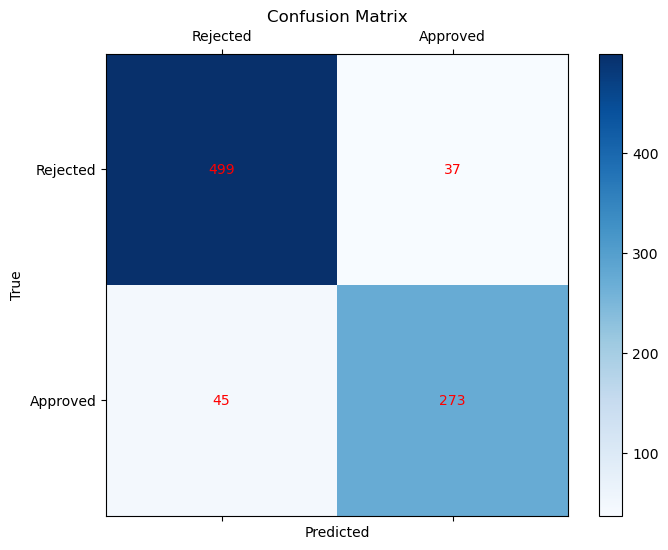

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Rejected', 'Approved'])
ax.set_yticklabels([''] + ['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(False)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')
plt.show()

In [28]:
# model = LogisticRegression()

# # Train the model on the training set

# model.fit(X_train, y_train)

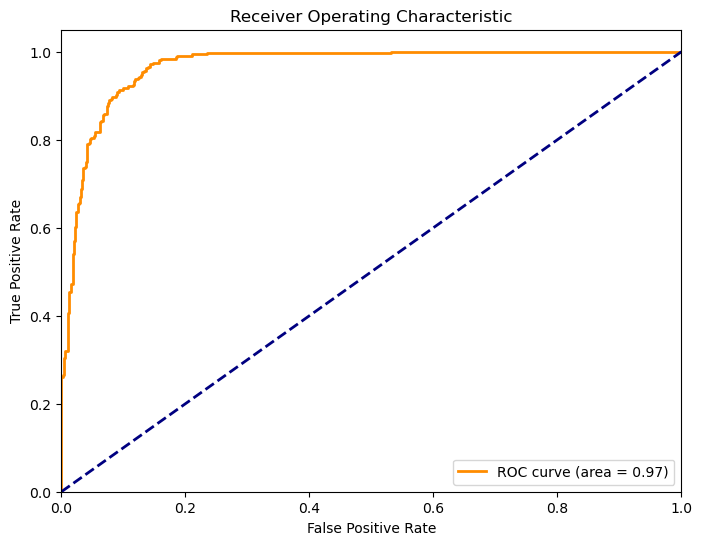

In [29]:
# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

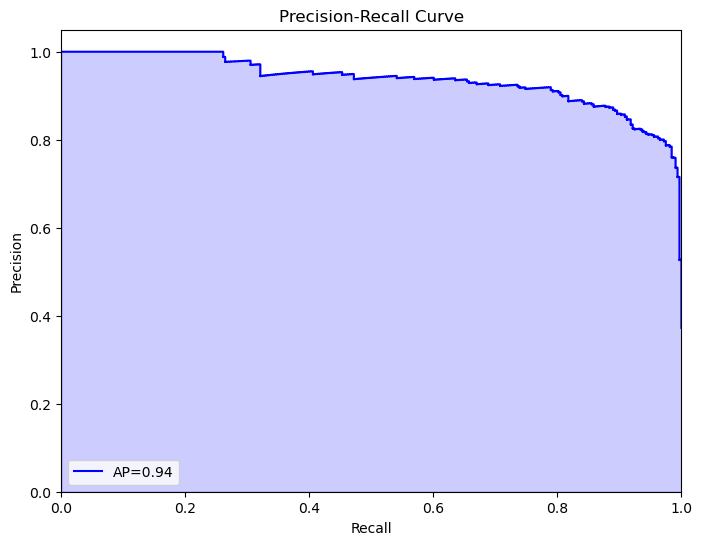

In [30]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', label=f'AP={average_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])  # Adjust the y-axis limits to make the plot aesthetically pleasing
plt.xlim([0.0, 1.0])   # Adjust the x-axis limits to ensure it covers the full range of recall
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [31]:
# Start Random Forest
# Initialize a Path object for the CSV file containing loan approval data.
path = Path("loan_approval_dataset.csv")

In [32]:
# Load the loan approval dataset from the CSV file into a DataFrame 'df2' and display the first and last 5 rows for a quick overview.
df2 = pd.read_csv(path)
display(df2.head())
display(df2.tail())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [33]:
# Print the dimensions (rows, columns) of the DataFrame 'df2' and generate descriptive statistics for its numeric columns.
print(df2.shape)
df2.describe()

(4269, 13)


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [34]:
# Remove the 'loan_id' column from the DataFrame 'df2' and display the first 5 rows of the updated DataFrame.
df2 = df2.drop(columns=['loan_id'])
df2.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [35]:
# Remove spaces from column names in 'df2' and convert the 'loan_status' column values from text to binary codes:
# 'Rejected' to 0 and 'Approved' to 1, then display the updated DataFrame.
df2.columns = df2.columns.str.replace(' ', '')
df2['loan_status'] = df2['loan_status'].map({' Rejected': 0,' Approved': 1})
df2

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [36]:
# Convert the 'education' and 'self_employed' categorical columns in 'df2' into one-hot encoded columns of integer type, keeping all categories, and update 'df2'.
df2 = pd.get_dummies(df2, columns=['education', 'self_employed'],dtype=int, drop_first=False)
df2

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,1,1,0


In [37]:
# Separate the DataFrame into feature variables (X2) by dropping the 'loan_status' column, and the target variable (y2) as 'loan_status'.
# Then, split these into training and testing sets with an 80:20 ratio, using a fixed random state for reproducibility.

X2 = df2.drop('loan_status', axis=1)  # Features
y2 = df2['loan_status']  # Target variable

# Split the data - 80% training, 20% testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Display the features and target variable for verification.
display(X2)
display(y2)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,1,1,0


0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [38]:
# Initialize and train a Random Forest classifier with 100 trees on the training data, setting a random state for reproducibility.
forest_model = RandomForestClassifier(n_estimators=100, random_state=42) 
forest_model.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predict loan approval outcomes on the test set using the trained Random Forest model. 
# Then, calculate and print the accuracy of the predictions against the actual outcomes, followed by
#  a detailed classification report for further evaluation of the model's performance.
forest_predictions = forest_model.predict(X2_test)


print(f"Accuracy: {accuracy_score(y2_test, forest_predictions)}")
print(classification_report(y2_test, forest_predictions))

Accuracy: 0.9800936768149883
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [40]:
# Generate and print the confusion matrix for the Random Forest model predictions to evaluate true positive, false positive, true negative, and false negative rates.
conf_matrix_forest = confusion_matrix(y2_test, forest_predictions)
print(conf_matrix_forest)

[[310   8]
 [  9 527]]


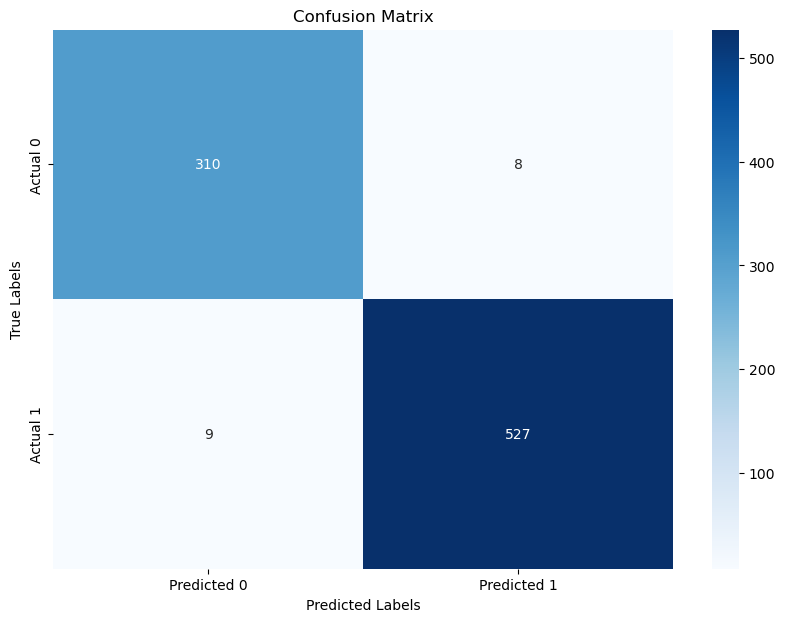

In [41]:
# Visualize the confusion matrix using a heatmap to better understand the model's performance.
# Customize the figure size, annotate each cell with the count, use a blue color map, and label axes with predicted and actual class labels for clarity. 
# The confusion matrix helps in assessing the number of correct and incorrect predictions by comparing actual vs. predicted labels.
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Retrieve and sort the feature importances from the Random Forest model in descending order. 
# This helps identify which features contribute most to the model's decision-making process.
feature_importances = forest_model.feature_importances_
sorted_feature = sorted(zip(feature_importances,X2.columns), reverse=True)
sorted_feature

[(0.7952518048968484, 'cibil_score'),
 (0.05951762633896786, 'loan_term'),
 (0.030967422602687204, 'loan_amount'),
 (0.020334441054126, 'residential_assets_value'),
 (0.020323529835082864, 'luxury_assets_value'),
 (0.01878355315877543, 'income_annum'),
 (0.01854448821897868, 'commercial_assets_value'),
 (0.017748422595217497, 'bank_asset_value'),
 (0.00960046691318195, 'no_of_dependents'),
 (0.0024903815751440724, 'self_employed_ No'),
 (0.0023343723506488094, 'self_employed_ Yes'),
 (0.002168782752899476, 'education_ Not Graduate'),
 (0.0019347077074417065, 'education_ Graduate')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

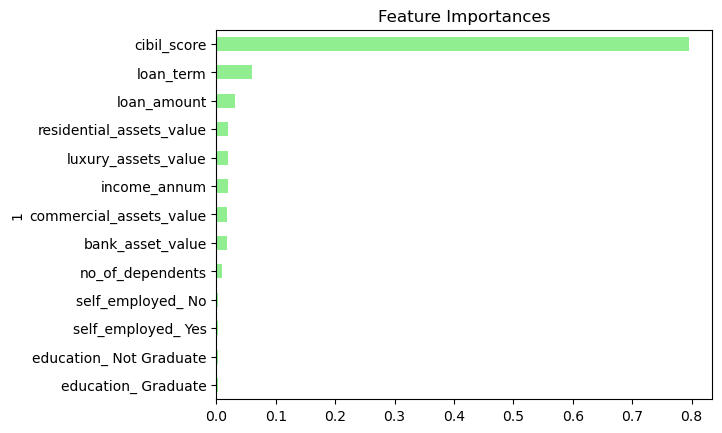

In [43]:
# Convert the sorted feature importances into a DataFrame for easier manipulation and visualization.
# Set the feature names as the index and drop the original index column. Rename the column to 'Feature Importances' for clarity.
# Then, sort the DataFrame by importances in ascending order to prepare for visualization. 
# Finally, plot the feature importances as a horizontal bar chart with a light green color, labeling the chart appropriately. 
# This visualization aids in understanding the relative importance of each feature in the model's predictions.
feature_importances_df = pd.DataFrame(sorted_feature)
feature_importances_df.set_index(feature_importances_df[1], inplace=True)
feature_importances_df.drop(columns=1, inplace=True)
feature_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = feature_importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

In [44]:
# Define a parameter grid for Random Forest hyperparameter tuning.
# Includes varying numbers of trees (n_estimators), maximum tree depths (max_depth), 
# minimum samples for splits (min_samples_split), and minimum samples for leaf nodes (min_samples_leaf) 
# to explore a range of configurations for optimizing model performance.
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 250],  # Number of trees in the forest
    'max_depth': range(3, 10),  # Maximum depth of the tree
    'min_samples_split': range(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 10),  # Minimum number of samples required to be at a leaf node
}

In [45]:

# Initialize a Random Forest classifier and configure a Grid Search with 5-fold cross-validation to find the best hyperparameters based on accuracy. 
# The search will evaluate combinations from the previously defined parameter grid, utilizing all available CPU cores for parallel computation.
rf2 = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [46]:
# Execute the grid search on the training data to find the best hyperparameter combination for the Random Forest model based on the training set's accuracy.
grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 20, 30, 50, 100, 200, 250]},
             scoring='accuracy')

In [47]:
# Output the best hyperparameter values found by the grid search and the highest accuracy score achieved during training.
# Then, retrieve the best performing model as 'best_model' for further use or evaluation.
print("Best parameters found:", grid_search.best_params_)
print("Best score during training:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters found: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Best score during training: 0.9777452415812592


In [48]:
# Predict outcomes on both the test and training datasets using the best model from the grid search. 
# Calculate and print the accuracy of the model on the training set to evaluate its performance and check for overfitting.
best_predictions = best_model.predict(X2_test)
train_predictions = best_model.predict(X2_train)
train_accuracy = accuracy_score(y2_train, train_predictions)
print(f"Accuracy on the training set: {train_accuracy}")

Accuracy on the training set: 0.9973645680819913


In [49]:
# Use the best model to predict outcomes on the test set, calculate its accuracy, and print the result to evaluate the model's generalization capability.
test_predictions = best_model.predict(X2_test)
test_accuracy = accuracy_score(y2_test, test_predictions)
print(f"Accuracy on the test set: {test_accuracy}")

Accuracy on the test set: 0.9789227166276346


In [50]:
# Print the accuracy of the best model on the test set and a detailed classification report 
# to evaluate its performance, including precision, recall, f1-score, and support for each class.

print(f"Accuracy: {accuracy_score(y2_test, test_predictions)}")
print(classification_report(y2_test, test_predictions))

Accuracy: 0.9789227166276346
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [51]:
# classification report before training the model 
print(f"Accuracy: {accuracy_score(y2_test, forest_predictions)}")
print(classification_report(y2_test, forest_predictions))

Accuracy: 0.9800936768149883
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [52]:
# END Of Random Forest

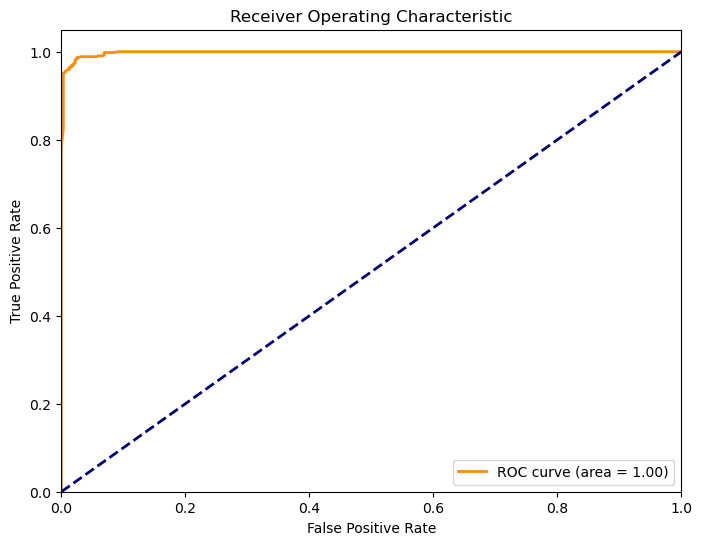

In [53]:
# ROC Curve 2
# Predict probabilities for the positive outcome only
y2_score = forest_model.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y2_test, y2_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

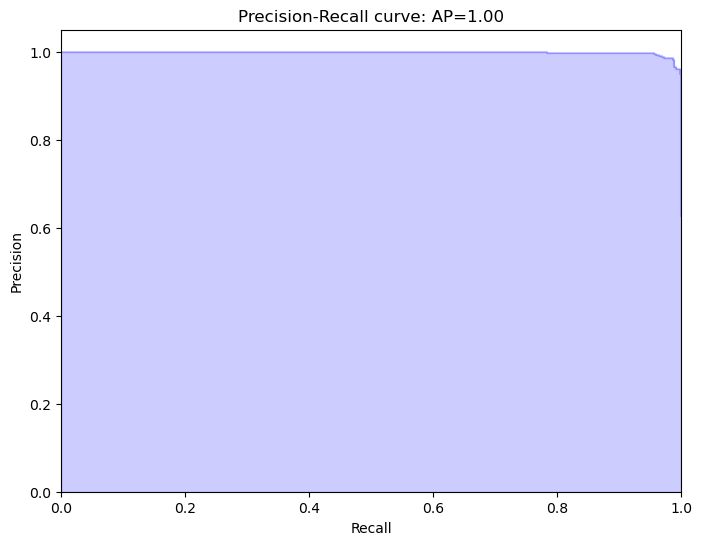

In [54]:
# Precision-Recall Curve 2
# Compute precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y2_test, y2_score)
average_precision = average_precision_score(y2_test, y2_score)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()